A list of most popular clustering algorithms:

* Affinity Propagation
* Agglomerative Clustering
* BIRCH
* DBSCAN
* K-Means
* Mini-Batch K-Means
* Mean Shift
* OPTICS
* Spectral Clustering
* Mixture of Gaussians

In [21]:
import sklearn

print(sklearn.__version__)

1.2.2


We will use the `make_classification()` function to create a test binary classification dataset. The dataset will have `1,000` examples, with `two input` features and `one cluster per class`. The clusters are visually obvious in two dimensions so that we can plot the data with a `scatter plot` and color the points in the plot by the assigned cluster. The clusters in this test problem are based on a `multivariate Gaussian`, and not all clustering algorithms will be effective at identifying these types of clusters.



In [22]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

RANDOM_SEED = 4

# Get the dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=RANDOM_SEED)

In [23]:
def plot_dataset_scattering(X, y, n_features):
    for class_val in range(2):
        row_ix = np.where(y==class_val)
        # Create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1])
    plt.show()

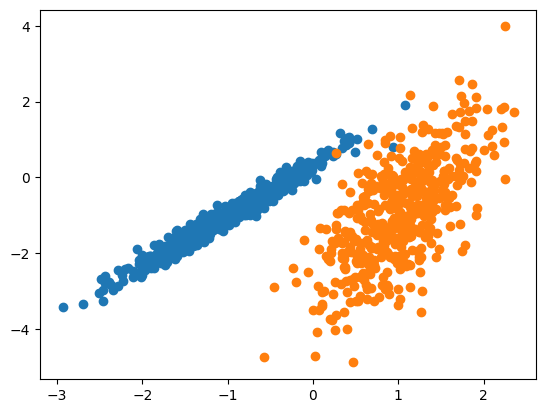

In [24]:
plot_dataset_scattering(X, y, n_features=2)

In [25]:
def train_clustering_model_and_plot_scattering(model, X, y):
    # Train the model with given data and assign a cluster to each examples
    y_res = model.fit_predict(X)

    # Get found unique clusters
    clusters = np.unique(y_res)

    for cluster in clusters:
        row_ix = np.where(y_res==cluster)
        # Create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1])
    plt.show()

### Affinity Propagation

Affinity Propagation method takes as input measures of similarity between pairs of data points. Real-valued messages are exchanged between data points until a high-quality set of exemplars and corresponding clusters gradually emerges

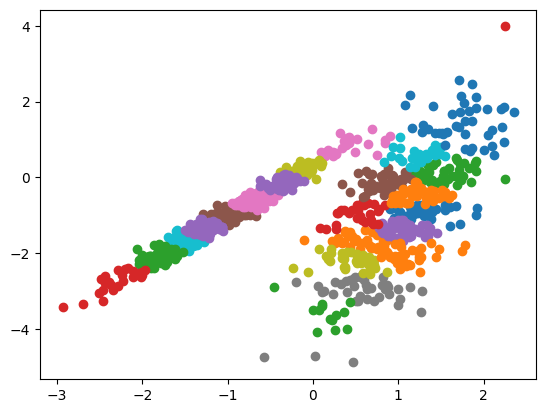

In [26]:
from sklearn.cluster import AffinityPropagation

# Create model and fit (train) with X data
affinity_model = AffinityPropagation(damping=0.9)

train_clustering_model_and_plot_scattering(affinity_model, X, y)

### Agglomerative Clustering

Agglomerative clustering involves merging examples `until the desired number of clusters is achieved`. It is a part of a broader class of `hierarchical clustering`. The main configuration to tune is the “`n_clusters`” set, an `estimate` of the number of `clusters` in the data, e.g. 2.

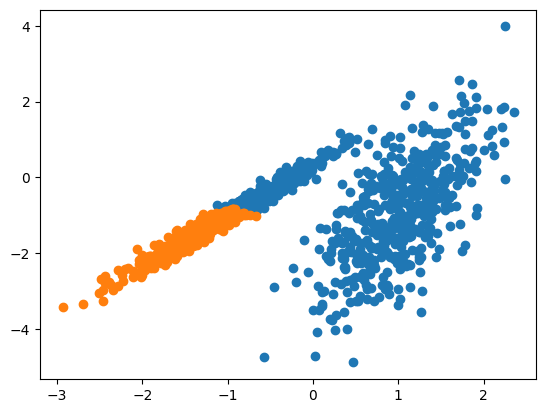

In [27]:
from sklearn.cluster import AgglomerativeClustering

agglomerative_model = AgglomerativeClustering(n_clusters=2)

train_clustering_model_and_plot_scattering(agglomerative_model, X, y)

### BIRCH Clustering (Balanced Iterative Reducing and Clustering using Hierarchies)

BIRCH incrementally and `dynamically clusters` incoming `multi-dimensional metric` data points to try to produce the best quality clustering with the available resources (i. e., available memory and time constraints)

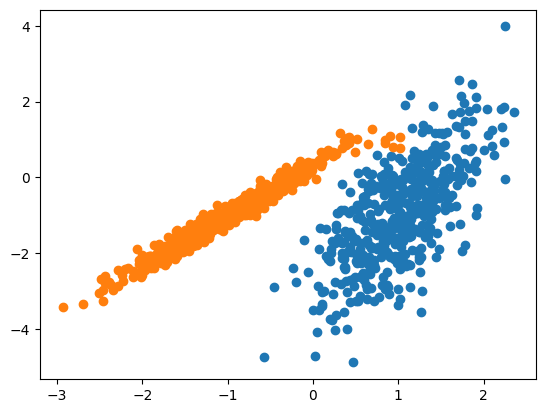

In [28]:
from sklearn.cluster import Birch

birch_model = Birch(threshold=0.01, n_clusters=2)

train_clustering_model_and_plot_scattering(birch_model, X, y)

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN Clustering algorithm involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters. DBSCAN requires `only one input parameter` and supports the user in determining an appropriate value for it.

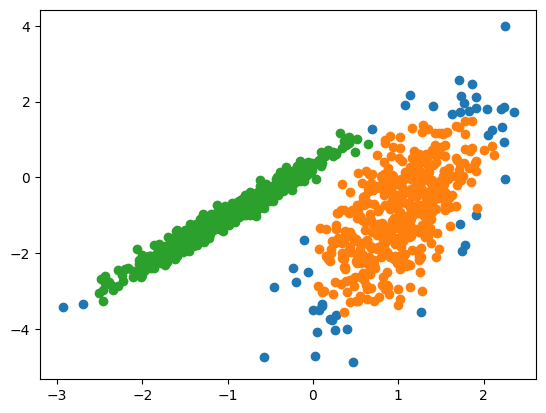

In [29]:
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=0.3, min_samples=9)

train_clustering_model_and_plot_scattering(dbscan_model, X, y)

### K-Means Clustering Algorithm

K-Means Clustering Algorithm tries to implement partitioning an `N-dimensional population` into k sets on the basis of a sample. The process, which is called ‘k-means,’ appears to give `partitions` that are reasonably efficient in the sense of `within-class variance`. It is implemented via the KMeans class and the main configuration to tune is the “`n_clusters`” hyperparameter set to the estimated number of clusters in the data.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


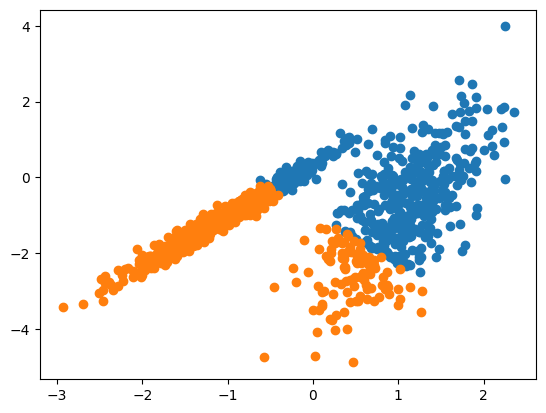

In [30]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2)

train_clustering_model_and_plot_scattering(kmeans_model, X, y)

### Mini-Batch K-Means

Mini-Batch K-Means is a modified version of k-means that makes `updates` to the `cluster centroids` using `mini-batches` of samples rather than the entire dataset, which can make it faster for large datasets, and perhaps more `robust` to `statistical noise`. This reduces computation cost by orders of magnitude compared to the classic batch algorithm while yielding significantly better solutions than online `stochastic gradient descent`. It is implemented via the `MiniBatchKMeans` class and the main configuration to tune is the “`n_clusters`” hyperparameter set to the estimated number of clusters in the data.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


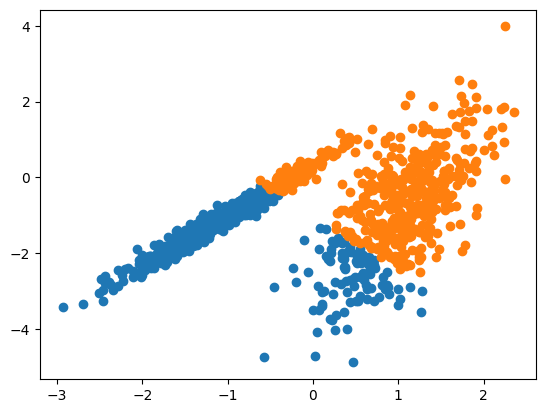

In [31]:
from sklearn.cluster import MiniBatchKMeans

minibatchKMeans_model = MiniBatchKMeans(n_clusters=2)

train_clustering_model_and_plot_scattering(minibatchKMeans_model, X, y)

### Mean Shift Clustering Algorithm

Mean shift clustering involves `finding` and `adapting centroids` based on the `density of examples` in the feature space. We prove for discrete data the convergence of a `recursive mean shift` procedure to the `nearest stationary point` of the underlying `density function` and thus its utility in detecting the modes of the density. It is implemented via the MeanShift class and the main configuration to tune is the “`bandwidth`” hyperparameter.

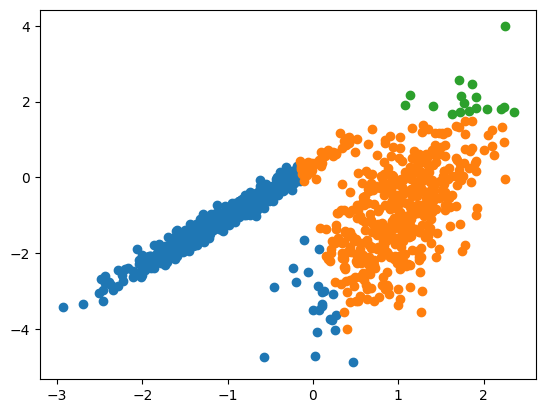

In [32]:
from sklearn.cluster import MeanShift

meanshift_model = MeanShift()

train_clustering_model_and_plot_scattering(meanshift_model, X, y)

### OPTICS (Ordering Points To Identify the Clustering Structure)

OPTICS algorithm `does not` produce a `cluster`ing of a data set `explicitly`; but instead `creates` an `augmented ordering` of the database representing its density-based clustering structure. This cluster-ordering contains information which is equivalent to the density-based clusterings corresponding to a broad range of parameter settings. It is implemented via the OPTICS class and the main configuration to tune is the “`eps`” and “`min_samples`” hyperparameters.

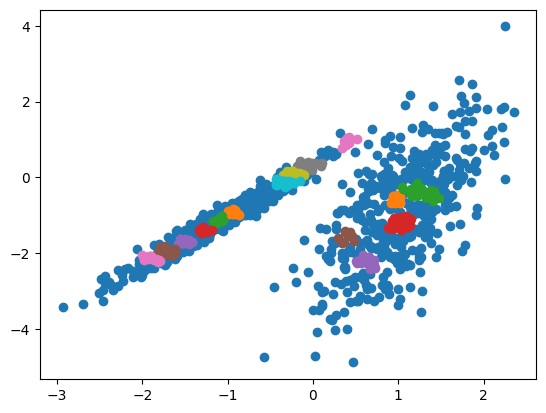

In [33]:
from sklearn.cluster import OPTICS

optics_model = OPTICS(eps=0.8, min_samples=10)

train_clustering_model_and_plot_scattering(optics_model, X, y)

### Spectral Clustering

Spectral Clustering is a general class of clustering methods, drawn from `linear algebra`. A promising alternative that has recently emerged in a number of fields is to use `spectral methods` for clustering. Here, one uses the `top eigenvectors` of a matrix derived from the `distance between points`. It is implemented via the `SpectralClustering` class and the main Spectral Clustering is a general class of clustering methods, drawn from linear algebra. to tune is the “`n_clusters`” hyperparameter used to specify the `estimated number of clusters` in the data.

! Spectral methods are a class of techniques used in applied mathematics and scientific computing to numerically solve certain differential equations using the method of weighted residuals.


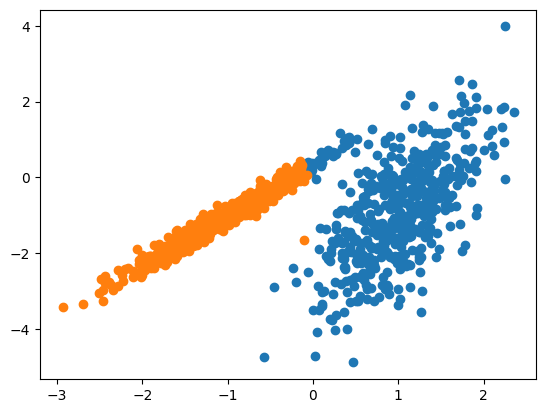

In [34]:
from sklearn.cluster import SpectralClustering

spectral_model = SpectralClustering(n_clusters=2)

train_clustering_model_and_plot_scattering(spectral_model, X, y)

### Gaussian Mixture Model

A Gaussian mixture model summarizes a `multivariate probability density function` with a mixture of `Gaussian probability distributions` as its name suggests. It is implemented via the `GaussianMixture` class and the main configuration to tune is the “`n_clusters`” hyperparameter used to specify the estimated number of clusters in the data.

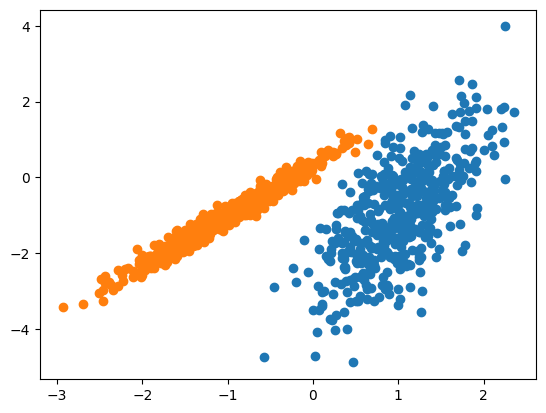

In [35]:
from sklearn.mixture import GaussianMixture

gaussian_mixture_model = GaussianMixture(n_components=2)

train_clustering_model_and_plot_scattering(gaussian_mixture_model, X, y)

### Reference

[Examples of Clustering Algorithms
](https://machinelearningmastery.com/clustering-algorithms-with-python/?source=post_page-----5a6ec9ae3c7d--------------------------------
)